<a href="https://colab.research.google.com/github/ilsangyoon/lsst_ica/blob/main/lsst_lightcurve_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the test code for Independent Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#LSST parameters from Ivezic et al., 2019, ApJ, 873, 111
tstart=1.0
tend=365.0*10.0
deltat=1.0 #shouldn't be too smaller than 1
sf0_u=0.3 #in order to estimate signal covariance sigma = SF0/sqrt(2)
sf0_g=0.27
sf0_r=0.25
sf0_i=0.24

#sf0_u=0.2 #in order to estimate signal covariance sigma = SF0/sqrt(2)
#sf0_g=0.2
#sf0_r=0.2
#sf0_i=0.2

#sf0_u=0.5 #in order to estimate signal covariance sigma = SF0/sqrt(2)
#sf0_g=0.4
#sf0_r=0.35
#sf0_i=0.32
nsamp=np.int((tend-tstart+1)/deltat)
times=np.linspace(tstart,tend,nsamp)
tau=700 # decorrelation time scale in days that should be cross-check by SF
#random seed
myseed=8129

In [6]:
def lightcurve_u(avgmag,t0,t1,delt,tau,P,ampl,amps,sigma):
    np.random.seed(myseed)
    mag5=23.78
    photerr2=(0.04-0.038)*10**(0.4*(avgmag-mag5)) + 0.038*10**(0.8*(avgmag-mag5))
    photerr=np.sqrt(photerr2)
    print("magu phot err: ", photerr)
    sigma=sigma/np.sqrt(2.0)
    nsamp=np.int((t1-t0+1)/deltat)
    times=np.linspace(t0,t1,nsamp)
    p0=np.random.normal(0.0,sigma)
    mag=[]
    time=[]
    pi=[]
    base1=ampl*np.sin(2*3.141592*times/P)
    base2=amps*np.exp(-0.5*100*np.cos(2*3.141592*(times/(3.5*P)))**2)
    base=base1+base2
    for i in range(len(times)):
        myt=times[i]
        p0=p0*np.exp(-delt/tau) + np.random.normal(0.0,sigma*np.sqrt((1.0-np.exp(-2*delt/tau))))
        pi.append(p0)
        time.append(myt)
        mag.append(p0+base[i]+np.random.normal(0.0,photerr))
    return(np.array(time),np.array(mag),np.array(pi),base1,base2)

In [7]:
def lightcurve_g(avgmag,t0,t1,delt,tau,P,ampl,amps,sigma):
    np.random.seed(myseed)
    mag5=24.81
    photerr2=(0.04-0.039)*10**(0.4*(avgmag-mag5)) + 0.039*10**(0.8*(avgmag-mag5))
    photerr=np.sqrt(photerr2)
    print("magg phot err: ", photerr)
    sigma=sigma/np.sqrt(2.0)
    nsamp=np.int((t1-t0+1)/deltat)
    times=np.linspace(t0,t1,nsamp)
    p0=np.random.normal(0.0,sigma)
    mag=[]
    time=[]
    pi=[]
    base1=ampl*np.sin(2*3.141592*times/P)
    base2=amps*np.exp(-0.5*100*np.cos(2*3.141592*(times/(3.5*P)))**2)
    base=base1+base2
    for i in range(len(times)):
        myt=times[i]
        p0=p0*np.exp(-delt/tau) + np.random.normal(0.0,sigma*np.sqrt((1.0-np.exp(-2*delt/tau))))
        pi.append(p0)
        time.append(myt)
        mag.append(p0+base[i]+np.random.normal(0.0,photerr))
    return(np.array(time),np.array(mag),np.array(pi),base1,base2)

In [8]:
def lightcurve_r(avgmag,t0,t1,delt,tau,P,ampl,amps,sigma):
    np.random.seed(myseed)
    mag5=24.35
    photerr2=(0.04-0.039)*10**(0.4*(avgmag-mag5)) + 0.039*10**(0.8*(avgmag-mag5))
    photerr=np.sqrt(photerr2)
    print("magr phot err: ", photerr)
    sigma=sigma/np.sqrt(2.0)
    nsamp=np.int((t1-t0+1)/deltat)
    times=np.linspace(t0,t1,nsamp)
    p0=np.random.normal(0.0,sigma)
    mag=[]
    time=[]
    pi=[]
    base1=ampl*np.sin(2*3.141592*times/P)
    base2=amps*np.exp(-0.5*100*np.cos(2*3.141592*(times/(3.5*P)))**2)
    base=base1+base2
    for i in range(len(times)):
        myt=times[i]
        p0=p0*np.exp(-delt/tau) + np.random.normal(0.0,sigma*np.sqrt((1.0-np.exp(-2*delt/tau))))
        pi.append(p0)
        time.append(myt)
        mag.append(p0+base[i]+np.random.normal(0.0,photerr))
    return(np.array(time),np.array(mag),np.array(pi),base1,base2)

In [9]:
def lightcurve_i(avgmag,t0,t1,delt,tau,P,ampl,amps,sigma):
    np.random.seed(myseed)
    mag5=23.92
    photerr2=(0.04-0.039)*10**(0.4*(avgmag-mag5)) + 0.039*10**(0.8*(avgmag-mag5))
    photerr=np.sqrt(photerr2)
    print("magi phot err: ", photerr)
    sigma=sigma/np.sqrt(2.0)
    nsamp=np.int((t1-t0+1)/deltat)
    times=np.linspace(t0,t1,nsamp)
    p0=np.random.normal(0.0,sigma)
    mag=[]
    time=[]
    pi=[]
    base1=ampl*np.sin(2*3.141592*times/P)
    base2=amps*np.exp(-0.5*100*np.cos(2*3.141592*(times/(3.5*P)))**2)
    base=base1+base2
    for i in range(len(times)):
        myt=times[i]
        p0=p0*np.exp(-delt/tau) + np.random.normal(0.0,sigma*np.sqrt((1.0-np.exp(-2*delt/tau))))
        pi.append(p0)
        time.append(myt)
        mag.append(p0+base[i]+np.random.normal(0.0,photerr))
    return(np.array(time),np.array(mag),np.array(pi),base1,base2)

In [10]:
#tstart=100
#tend=365*2
#sinamp 0.005
#gspike amp 0.02-0.01
#time,umag,pi,base1,base2=lightcurve_u(22,tstart,tend,1,200,1000,0.3,0.5,sf0_u) #photerr 0.005 -> 0.5% 0.01->1% error
#time,gmag,pi,base1,base2=lightcurve_g(21,tstart,tend,1,200,1000,0.3,0.5,sf0_g)
#time,rmag,pi,base1,base2=lightcurve_r(20,tstart,tend,1,200,1000,0.3,0.5,sf0_r)
#time,imag,pi,base1,base2=lightcurve_i(19,tstart,tend,1,200,1000,0.3,0.5,sf0_i)

time,umag,pi,base1,base2=lightcurve_u(22,tstart,tend,1.0,200,1000,0.3,0.6,sf0_u) #photerr 0.005 -> 0.5% 0.01->1% error
time,gmag,pi,base1,base2=lightcurve_g(21,tstart,tend,1.0,200,1000,0.3,0.5,sf0_g)
time,rmag,pi,base1,base2=lightcurve_r(20,tstart,tend,1.0,200,1000,0.3,0.4,sf0_r)
time,imag,pi,base1,base2=lightcurve_i(19,tstart,tend,1.0,200,1000,0.3,0.3,sf0_i)
#time lag


toff=0
ioff=np.min(np.where(times>toff))
time=np.roll(time,ioff)
time2=time[ioff:]
umag2=umag[ioff:]
gmag2=np.roll(gmag,ioff)
gmag2=gmag2[ioff:]
rmag2=rmag[ioff:]
imag2=imag[ioff:]

magu phot err:  0.042657374645627286
magg phot err:  0.008052445108320587
magr phot err:  0.005577734515367403
magi phot err:  0.003909460810048274


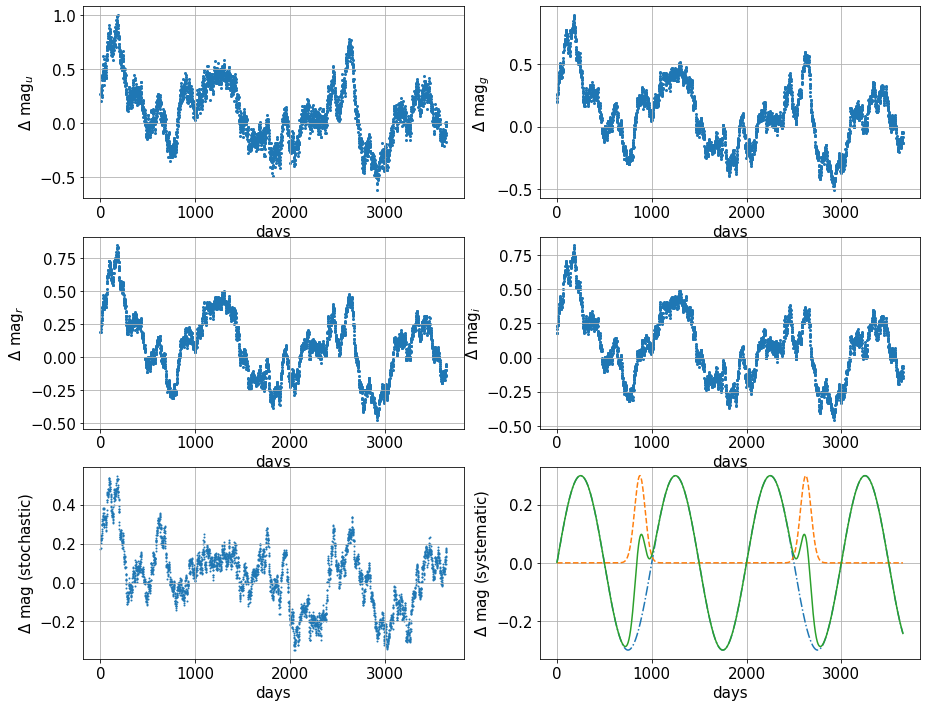

In [11]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,12))
ax[0,0].scatter(time,umag,s=4)
ax[0,0].set_xlabel('days', fontsize=15)
ax[0,0].set_ylabel(r'$\Delta$ mag$_{u}$',fontsize=15)
ax[0,0].tick_params(axis='x',labelsize=15)
ax[0,0].tick_params(axis='y',labelsize=15)
ax[0,0].grid()
#
ax[0,1].scatter(time,gmag,s=4)
ax[0,1].set_xlabel('days', fontsize=15)
ax[0,1].set_ylabel(r'$\Delta$ mag$_{g}$',fontsize=15)
ax[0,1].tick_params(axis='x',labelsize=15)
ax[0,1].tick_params(axis='y',labelsize=15)
ax[0,1].grid()
#
ax[1,0].scatter(time,rmag,s=4)
ax[1,0].set_xlabel('days', fontsize=15)
ax[1,0].set_ylabel(r'$\Delta$ mag$_{r}$',fontsize=15)
ax[1,0].tick_params(axis='x',labelsize=15)
ax[1,0].tick_params(axis='y',labelsize=15)
ax[1,0].grid()
#
ax[1,1].scatter(time,imag,s=4)
ax[1,1].set_xlabel('days', fontsize=15)
ax[1,1].set_ylabel(r'$\Delta$ mag$_{i}$',fontsize=15)
ax[1,1].tick_params(axis='x',labelsize=15)
ax[1,1].tick_params(axis='y',labelsize=15)
ax[1,1].grid()
#
ax[2,0].scatter(time,pi,s=1)
ax[2,0].set_xlabel('days', fontsize=15)
ax[2,0].set_ylabel(r'$\Delta$ mag (stochastic)',fontsize=15)
ax[2,0].tick_params(axis='x',labelsize=15)
ax[2,0].tick_params(axis='y',labelsize=15)
ax[2,0].grid()
#
ax[2,1].plot(time,base1,linestyle='-.')
ax[2,1].plot(time,base2,linestyle='--')
ax[2,1].plot(time,base1+base2,linestyle='-')
ax[2,1].set_xlabel('days', fontsize=15)
ax[2,1].set_ylabel(r'$\Delta$ mag (systematic)',fontsize=15)
ax[2,1].tick_params(axis='x',labelsize=15)
ax[2,1].tick_params(axis='y',labelsize=15)
ax[2,1].grid()


Text(0, 0.5, 'PSD')

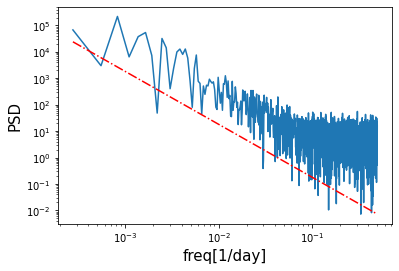

In [12]:
sp=np.fft.fft(umag)
sp=np.fft.fftshift(sp)
psd=np.absolute(sp)**2
freq=np.fft.fftfreq(len(time))
freq=np.fft.fftshift(freq)
idx=np.where(freq>0.0)
freq1=freq[idx]
psd1=psd[idx]
psdt2=1./(freq1**2)
psdt1=1./(freq1**1)
plt.plot(freq1,psd1)
#plt.plot(freq1,np.min(psd1)/np.min(psdt1)*psdt1,color='red',linestyle='--')
plt.plot(freq1,np.min(psd1)/np.min(psdt2)*psdt2,color='red',linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq[1/day]',fontsize=15)
plt.ylabel('PSD',fontsize=15)
#print(freq[idx])
#print(psd[idx])

In [13]:
import numpy as np
import pylab as pl
from sklearn.decomposition import FastICA

In [15]:
transformer = FastICA(n_components=4,random_state=0,max_iter=1000,tol=0.1)
X = np.c_[umag,gmag,rmag,imag]
#X = np.c_[umag,gmag]
print(X.shape)
#A = np.array([[1, 1], [0.0, 0.0]])
#X = np.dot(magarr,A.T)

(3650, 4)


In [16]:
source = transformer.fit_transform(X)
mixM=transformer.mixing_
print(source.shape)
print(mixM)

(3650, 4)
[[-10.43589268  -4.9550084   11.71090386   5.15655626]
 [-10.64646965  -2.67628805  10.83499276   3.70750041]
 [-10.79768151  -2.35513215  10.05010986   2.30596847]
 [-10.91344577  -2.16308427   9.66398601   0.94225637]]


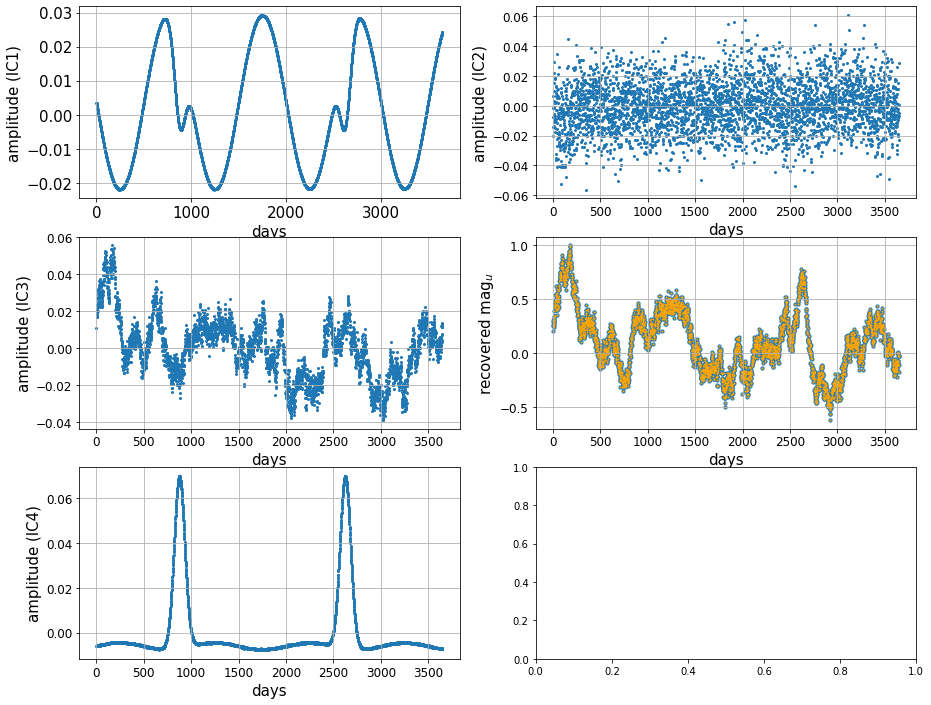

In [17]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,12))
ax[0,0].scatter(time,source[:,0],s=4)
ax[0,0].set_ylabel("amplitude (IC1)",fontsize=15)
ax[0,0].set_xlabel("days",fontsize=15)
ax[0,0].tick_params(axis='x',labelsize=15)
ax[0,0].tick_params(axis='y',labelsize=15)
ax[0,0].grid()
#
ax[0,1].scatter(time,source[:,1],s=4)
ax[0,1].set_ylabel("amplitude (IC2)",fontsize=15)
ax[0,1].set_xlabel("days",fontsize=15)
ax[0,1].tick_params(axis='x',labelsize=12)
ax[0,1].tick_params(axis='y',labelsize=12)
ax[0,1].grid()
#
ax[1,0].scatter(time,source[:,2],s=4)
ax[1,0].set_ylabel("amplitude (IC3)",fontsize=15)
ax[1,0].set_xlabel("days",fontsize=15)
ax[1,0].tick_params(axis='x',labelsize=12)
ax[1,0].tick_params(axis='y',labelsize=12)
ax[1,0].grid()
#
ax[1,1].scatter(time,(np.dot(source,mixM.T)+transformer.mean_)[:,0],s=10)
ax[1,1].scatter(time,umag,s=1,color='orange')
ax[1,1].set_ylabel(r"recovered mag$_{u}$",fontsize=15)
ax[1,1].set_xlabel("days",fontsize=15)
ax[1,1].tick_params(axis='x',labelsize=12)
ax[1,1].tick_params(axis='y',labelsize=12)
ax[1,1].grid()
#
ax[2,0].scatter(time,source[:,3],s=4)
ax[2,0].set_ylabel("amplitude (IC4)",fontsize=15)
ax[2,0].set_xlabel("days",fontsize=15)
ax[2,0].tick_params(axis='x',labelsize=12)
ax[2,0].tick_params(axis='y',labelsize=12)
ax[2,0].grid()